# DATA SCIENCE INTERN @ LetsGrowMore 

## NOVEMBER 2021

### DEVELOPER : SHIVIE SAKSENAA

##### IMPORTING LIBRARIES 

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
import statistics

##### LOADING DATASET

In [201]:
df=pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


##### DATA VISUALISATIONS 

HISTOGRAM

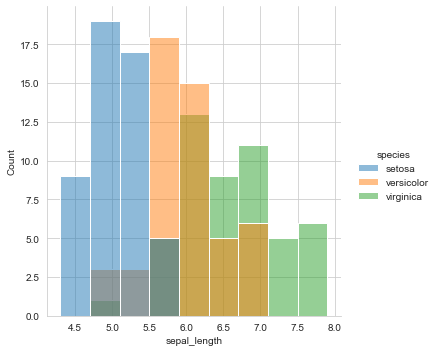

In [202]:
sns.displot(df, x="sepal_length", hue="species")


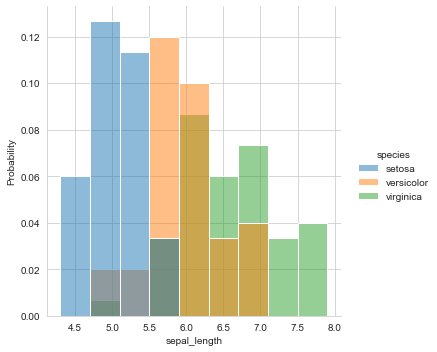

In [203]:
sns.displot(df, x="sepal_length", hue="species", stat="probability")


LINE PLOT

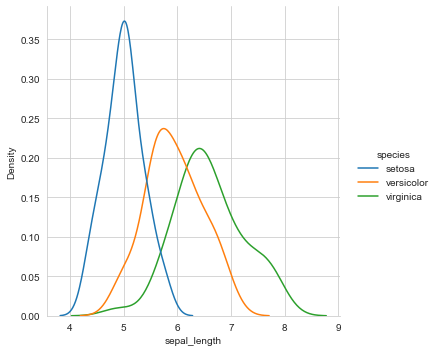

In [204]:
sns.displot(df, x="sepal_length", hue="species", kind="kde")


HEATMAP

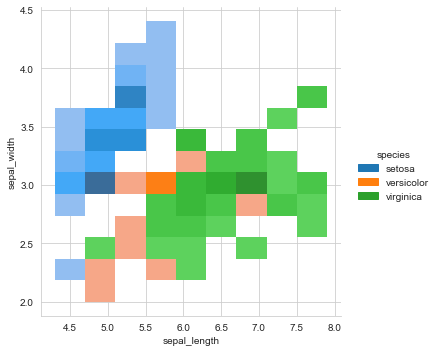

In [205]:
sns.displot(df, x="sepal_length", y="sepal_width", hue="species")
sns.set_style('whitegrid')

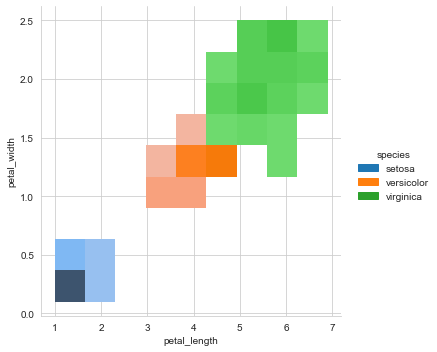

In [206]:
sns.displot(df, x="petal_length", y="petal_width", hue="species")


CORREALTION BETWEEN FEATURES 

In [207]:
df.cov()
#cov>0 = positively correlated 
#cov<0 = negativly correlated
#cov=0   uncorrelted

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.039268,1.273682,0.516904
sepal_width,-0.039268,0.188004,-0.321713,-0.117981
petal_length,1.273682,-0.321713,3.113179,1.296387
petal_width,0.516904,-0.117981,1.296387,0.582414


CHECKING FOR OUTLIERS 

<AxesSubplot:>

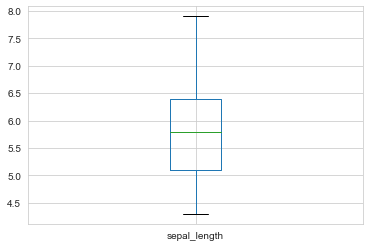

In [208]:
df.boxplot(column=['sepal_length'])

<AxesSubplot:>

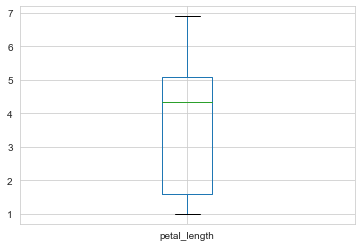

In [209]:
df.boxplot(column=['petal_length'])

In [210]:
data=df['petal_width']
median=np.median(data)
outliers=[]
min=data.min()
max=data.max()
q1=data.quantile(0.25)
q3=data.quantile(0.75)
range1= (q3-q1)
min_pt=q1-1.5*range1
max_pt=q3+1.5*range1
for i in data:
    if i<min_pt or i>max_pt:
        outliers.append(i)
print(outliers)


[]


In [211]:
data=df['sepal_length']
mean=np.mean(data)
sd=np.std(data)
outliers=[]
for i in data:
    z_score=(i-mean)/sd
    if abs(z_score)>2:
        outliers.append(i)
    else:
        break
print(outliers)
    

[]


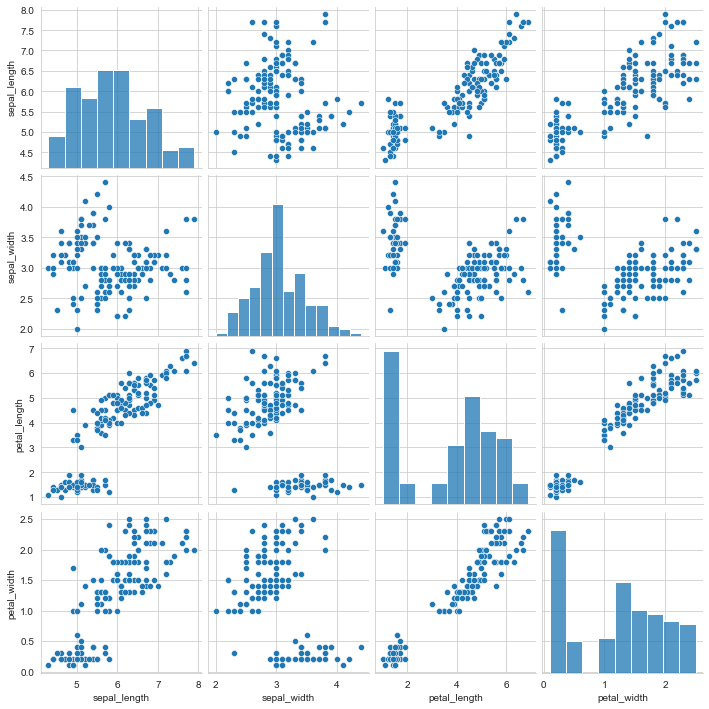

In [212]:
sns.pairplot(df)

we can say that (sepal_length and petal_length),(petal_width and petal_length) have a positively linear relationship.
species have no relationship with petal_length,sepal_length, petal_width and petal_length.

#### Preprocessing technique:

In [213]:
from sklearn.preprocessing import LabelEncoder

In [214]:
le=LabelEncoder()
df.species=le.fit_transform(df['species'])

In [215]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Measure of Association:

In [216]:
w=df['sepal_length']
x=df['sepal_width']
y=df['petal_length']
z=df['petal_width']


In [217]:
w.corr(x,method='pearson') #weak linear relationship

-0.10936924995064937

In [218]:
x.corr(y,method='pearson')

-0.42051609640115445

In [219]:
y.corr(z,method='pearson') #almost one so perfect linear realtionship

0.9627570970509663

In [220]:
z.corr(w,method='pearson') #almost one so perfect linear realtionship

0.8179536333691637

### Feature Selection:

In [221]:
x=df.iloc[:,:4]

In [222]:
y=df['species']

In [223]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [224]:
test=SelectKBest(score_func=chi2,k=2)
fit=test.fit(x,y)

In [225]:
np.set_printoptions(precision=3)
print(fit.scores_)

[ 10.818   3.594 116.17   67.245]


1.petal length 
2.petal width 
3.sepal_length 
4.sepal_width


### Model Processing 

LOGISTIC REGRESSION

In [226]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [227]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [228]:
y=df['species']
x=df.iloc[:,0:4]

In [229]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [230]:
lr=LogisticRegression()

In [231]:
lol=lr.fit(x_train,y_train)

C:\Users\hp\miniconda2\envs\notebook\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [232]:
predict=lol.predict(x_test)

In [233]:
from sklearn.metrics import accuracy_score
print('Accuracy of model is',accuracy_score(y_test,predict)*100,'%')

Accuracy of model is 100.0 %


DECESSION TREE 

In [234]:
from sklearn.tree import DecisionTreeClassifier

In [235]:
dt=DecisionTreeClassifier()

In [236]:
lol2=dt.fit(x_train,y_train)

In [237]:
predict2=lol2.predict(x_test)

In [238]:
print('Accuracy of model is',accuracy_score(y_test,predict2)*100,'%')

Accuracy of model is 95.55555555555556 %


K-NEAREST NEIGHBOR 

In [239]:
from sklearn.neighbors import KNeighborsClassifier

In [240]:
kn=KNeighborsClassifier(n_neighbors=3)

In [241]:
lol3=kn.fit(x_train,y_train)

In [242]:
predict3=lol3.predict(x_test)

In [243]:
print('Accuracy of model is',accuracy_score(y_test,predict3)*100,'%')

Accuracy of model is 95.55555555555556 %
